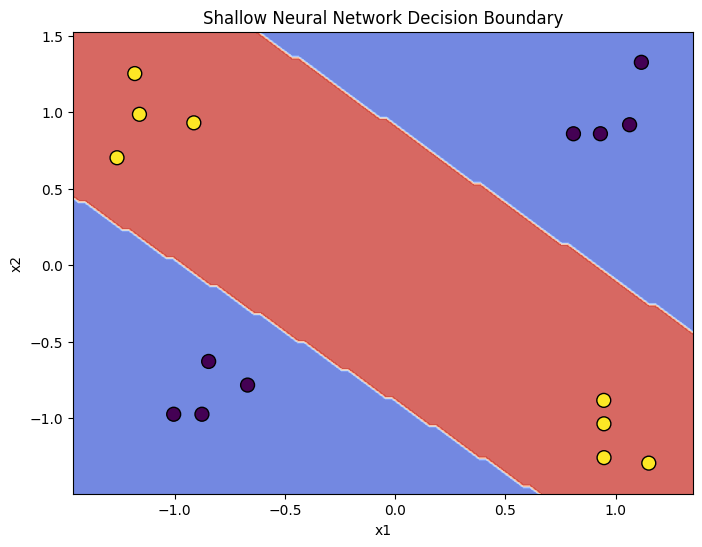

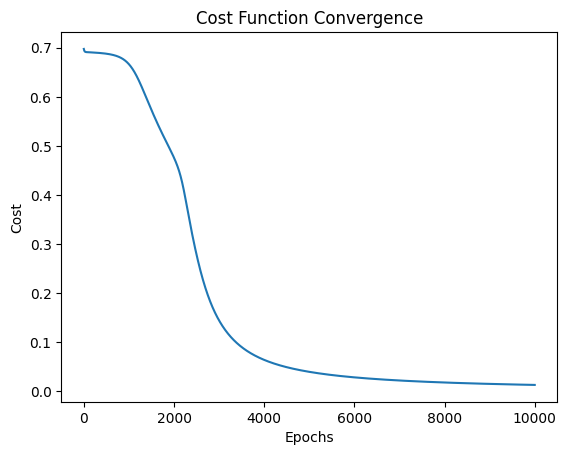

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Create Pseudo-XOR Dataset
def create_pseudo_xor_dataset():
    cluster_means = [(0, 0, 0), (1, 0, 1), (0, 1, 1), (1, 1, 0)]
    data = []
    np.random.seed(42)
    for cx, cy, label in cluster_means:
        x1 = np.random.normal(loc=cx, scale=0.1, size=4)
        x2 = np.random.normal(loc=cy, scale=0.1, size=4)
        labels = [label] * 4
        data.extend(zip(x1, x2, labels))
    data = np.array(data)
    return data[:, 0], data[:, 1], data[:, 2].astype(int)

# Step 2: Neural Network Forward Pass
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def forward_pass(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)  # Activation for hidden layer
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)  # Activation for output layer
    return Z1, A1, Z2, A2

# Step 3: Cost Function
def cost_function(y, A2):
    m = len(y)
    return -1/m * np.sum(y * np.log(A2) + (1 - y) * np.log(1 - A2))

# Step 4: Backpropagation
def backpropagation(X, y, Z1, A1, A2, W2):
    m = len(y)

    # Output layer error and delta
    error_output = A2 - y # Error for the output layer (dC/dZ2 for binary cross-entropy with sigmoid)
    delta_output = error_output # Renaming for clarity based on common NN terminology

    dW2 = np.dot(A1.T, delta_output) / m
    db2 = np.sum(delta_output, axis=0, keepdims=True) / m

    # Hidden layer error and delta
    error_hidden = np.dot(delta_output, W2.T) # Error propagated back to the hidden layer
    delta_hidden = error_hidden * A1 * (1 - A1) # Hadamard product with derivative of sigmoid (dZ1)

    dW1 = np.dot(X.T, delta_hidden) / m
    db1 = np.sum(delta_hidden, axis=0, keepdims=True) / m
    return dW1, db1, dW2, db2

# Step 5: Training the Neural Network
def train_shallow_nn(X, y, hidden_neurons=2, learning_rate=0.1, epochs=10000):
    np.random.seed(42)
    input_neurons = X.shape[1]
    output_neurons = 1

    # Initialize weights and biases
    W1 = np.random.randn(input_neurons, hidden_neurons)
    b1 = np.zeros((1, hidden_neurons))
    W2 = np.random.randn(hidden_neurons, output_neurons)
    b2 = np.zeros((1, output_neurons))

    costs = []

    for epoch in range(epochs):
        # Forward pass
        Z1, A1, Z2, A2 = forward_pass(X, W1, b1, W2, b2)

        # Compute cost
        cost = cost_function(y, A2)
        costs.append(cost)

        # Backpropagation
        dW1, db1, dW2, db2 = backpropagation(X, y, Z1, A1, A2, W2)

        # Update weights and biases
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2

    return W1, b1, W2, b2, costs

# Step 6: Plot Decision Boundary
def plot_decision_boundary(X, y, W1, b1, W2, b2):
    x1_vals = np.linspace(X[:, 0].min() - 0.2, X[:, 0].max() + 0.2, 100)
    x2_vals = np.linspace(X[:, 1].min() - 0.2, X[:, 1].max() + 0.2, 100)
    x1_grid, x2_grid = np.meshgrid(x1_vals, x2_vals)
    grid_points = np.c_[x1_grid.ravel(), x2_grid.ravel()]

    _, _, _, A2 = forward_pass(grid_points, W1, b1, W2, b2)
    predictions = (A2 > 0.5).astype(int).reshape(x1_grid.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(x1_grid, x2_grid, predictions, alpha=0.8, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='viridis', s=100)
    plt.title("Shallow Neural Network Decision Boundary")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()

# Main Program
x1, x2, y = create_pseudo_xor_dataset()
X = np.column_stack((x1, x2))
y = y.reshape(-1, 1)

# Normalize data
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Train the shallow neural network
W1, b1, W2, b2, costs = train_shallow_nn(X, y, hidden_neurons=2, learning_rate=0.1, epochs=10000)

# Plot decision boundary
plot_decision_boundary(X, y, W1, b1, W2, b2)

# Plot cost function convergence
plt.plot(range(len(costs)), costs)
plt.title("Cost Function Convergence")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.show()

In [ ]:
For a neural network using binary cross-entropy loss with a sigmoid activation function in the output layer, the derivative of the cost function with respect to the pre-activation output (Z2) simplifies considerably.

Let's break it down:

Cost Function (C) for Binary Cross-Entropy: C = - [y * log(A2) + (1 - y) * log(1 - A2)]

Sigmoid Activation (A2): A2 = 1 / (1 + exp(-Z2))

Derivative of Sigmoid with respect to Z2: dA2/dZ2 = A2 * (1 - A2)

Derivative of Cost with respect to A2: dC/dA2 = - (y/A2 - (1 - y)/(1 - A2)) dC/dA2 = - [(y(1 - A2) - (1 - y)A2) / (A2(1 - A2))] dC/dA2 = - [(y - yA2 - A2 + yA2) / (A2(1 - A2))] dC/dA2
= - [(y - A2) / (A2(1 - A2))] dC/dA2 = (A2 - y) / (A2(1 - A2))

Applying the Chain Rule for dC/dZ2 (which is delta_output): delta_output = dC/dZ2 = (dC/dA2) * (dA2/dZ2)
delta_output = [(A2 - y) / (A2(1 - A2))] * [A2 * (1 - A2)]

As you can see, the A2 * (1 - A2) terms cancel out, simplifying delta_output to just A2 - y.
 This is a common and very convenient simplification for this specific combination of loss and activation function.

So, error_output (which is A2 - y) is directly the delta_output for the output layer.
The * (A2) * (1-A2) part is implicitly handled by this simplification.